# Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget -O face_emotion.zip "https://filesender.renater.fr/download.php?token=1399b9ee-9f53-4f8a-b921-d212325f06a4&files_ids=10167290" facemask


--2021-12-06 05:59:43--  https://filesender.renater.fr/download.php?token=1399b9ee-9f53-4f8a-b921-d212325f06a4&files_ids=10167290
Resolving filesender.renater.fr (filesender.renater.fr)... 194.57.3.10
Connecting to filesender.renater.fr (filesender.renater.fr)|194.57.3.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80330117 (77M) [application/zip]
Saving to: ‘face_emotion.zip’

face_emotion.zip    100%[===================>]  76.61M   478KB/s    in 2m 47s  

2021-12-06 06:02:31 (470 KB/s) - ‘face_emotion.zip’ saved [80330117/80330117]

--2021-12-06 06:02:31--  http://facemask/
Resolving facemask (facemask)... failed: Name or service not known.
wget: unable to resolve host address ‘facemask’
FINISHED --2021-12-06 06:02:31--
Total wall clock time: 2m 48s
Downloaded: 1 files, 77M in 2m 47s (470 KB/s)


In [ ]:
!unzip -q face_emotion.zip -d image_emotion

In [ ]:
picture_size = 48

Loading the data to numpy arrays

In [ ]:
import os
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
dataset_Foldre="image_emotion/image_emotion/train"
dataset_Classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]
data = []
labels = []
for folder in dataset_Classes:
    path = os.path.join(dataset_Foldre,folder)
    category_num = dataset_Classes.index(folder)
    for image_name in os.listdir(path):
        image_path = os.path.join(path,image_name)
        image = load_img(image_path, target_size=(picture_size, picture_size),color_mode="grayscale")
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category_num)   

data_train = np.array(data, dtype="float32")
labels_train = np.array(labels)
dataset_Foldre="image_emotion/image_emotion/test"
data = []
labels = []
for folder in dataset_Classes:
    path = os.path.join(dataset_Foldre,folder)
    category_num = dataset_Classes.index(folder)
    for image_name in os.listdir(path):
        image_path = os.path.join(path,image_name)
        image = load_img(image_path, target_size=(picture_size, picture_size),color_mode="grayscale")
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category_num)        

data_test = np.array(data, dtype="float32")
labels_test = np.array(labels)

# Data analysis

In [ ]:
print("The size of the training data is X={} Y={} ".format(data_train.shape, labels_train.shape[0]))
print("The size of the test data is X={} Y={} ".format(data_test.shape, labels_test.shape[0]))

The size of the training data is X=(28709, 48, 48, 1) Y=28709 
The size of the test data is X=(7178, 48, 48, 1) Y=7178 


Splitting the test data into test/validation sets

In [ ]:
test = [(x,y) for x,y in zip(labels_test, data_test)]
from random import  shuffle
shuffle(test)

In [ ]:
labels_test = [x[0] for x in test]
data_test = [x[1] for x in test]
data_test = np.array(data_test, dtype="float32")
labels_test = np.array(labels_test)
#splitting the test set into test/validation sets
data_val = data_test[:7178//2]
labels_val = labels_test[:7178//2]
data_test = data_test[7178//2:]
labels_test = labels_test[7178//2:]
print("The size of the test data is X={} Y={} ".format(data_test.shape, labels_test.shape[0]))
print("The size of the validation data is X={} Y={} ".format(data_val.shape, labels_val.shape[0]))

The size of the test data is X=(3589, 48, 48, 1) Y=3589 
The size of the validation data is X=(3589, 48, 48, 1) Y=3589 


Visualization of the distribution of the emotions in the training data

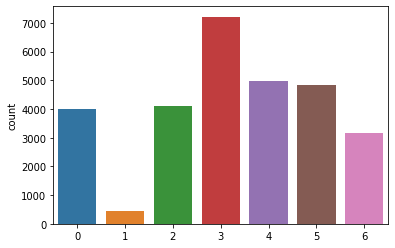

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=labels_train)

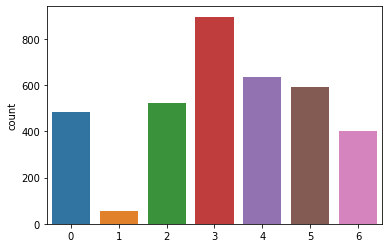

In [ ]:
sns.countplot(x=labels_val)

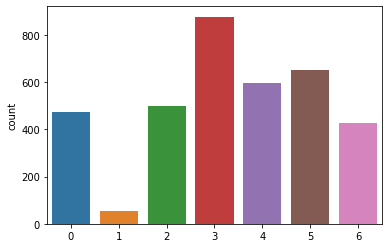

In [ ]:
sns.countplot(x=labels_test)